In [16]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re
import warnings
import os
warnings.filterwarnings('ignore')

# read fc time course:
input_dir = "data_fmri_time_course_seed/"
input_dir2 = "data_fmri_time_course_target (8d37aeeb)/"

output_dir = "out03_functional_connectivity_common_mask/"

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

    
files_seed = natsorted(glob.glob(input_dir + "time_course_??HC*.txt") 
                       + glob.glob(input_dir + "time_course_NTS*.txt")
                      )

files_target = natsorted(glob.glob(input_dir2 + "time_course_target_??HC*.txt")
                       + glob.glob(input_dir2 + "time_course_target_NTS*.txt")
                        )

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    'group': [re.findall("TEHC|NTHC|NTS", x)[0] for x in files_seed],
})

df1 = pd.read_csv(files_seed[0], sep = '\t')
df1.pop(df1.columns[-1])
seed_list = list(df1.columns)
seed_list = ['_'.join(x.split('_')[1:]) for x in seed_list]
print(seed_list)
print(len(seed_list))

df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
target_list = list(df2.columns)
target_list = ['_'.join(x.split('_')[1:]) for x in target_list]
print(target_list)
print(len(target_list))

# calculate pearson correlation between seed and target regions:
for seed in df1:
    for target in df2:
        col_label = '_'.join(seed.split('_')[1:]) + '*' + '_'.join(target.split('_')[1:])
        df_connectivity[col_label] = np.nan
        
# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out02_img_file_info_life_time_mdd_tms_response.csv')

# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response.csv')
# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
df_hc = pd.read_csv('out02_img_file_info_tms_response_hc_zscore_gm.3.csv')

subject_selected = list(df_hc['subject_id'].unique()) + list(df_life_time_mdd['subject_id'])
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity


['L_aMFG_10-6mm', 'L_aMFG_10mm', 'L_aMFG_14-10mm', 'L_aMFG_14mm', 'L_aMFG_6mm', 'L_pMFG_10-6mm', 'L_pMFG_10mm', 'L_pMFG_14-10mm', 'L_pMFG_14mm', 'L_pMFG_6mm', 'R_aMFG_10-6mm', 'R_aMFG_10mm', 'R_aMFG_14-10mm', 'R_aMFG_14mm', 'R_aMFG_6mm', 'R_FEF_10-6mm', 'R_FEF_10mm', 'R_FEF_14-10mm', 'R_FEF_14mm', 'R_FEF_6mm', 'R_IFJ_10-6mm', 'R_IFJ_10mm', 'R_IFJ_14-10mm', 'R_IFJ_14mm', 'R_IFJ_6mm', 'R_IPL_10-6mm', 'R_IPL_10mm', 'R_IPL_14-10mm', 'R_IPL_14mm', 'R_IPL_6mm', 'R_M1_10-6mm', 'R_M1_10mm', 'R_M1_14-10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10-6mm', 'R_pMFG_10mm', 'R_pMFG_14-10mm', 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10-6mm', 'R_preSMA_10mm', 'R_preSMA_14-10mm', 'R_preSMA_14mm', 'R_preSMA_6mm']
45
['dACC_10mm', 'dACC_6mm', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 'l-dACC_MNI152_2mm', 'r-dACC_MNI152_2mm', 'sgACC_6_16_-10_10mm']
8


In [17]:
df_connectivity.head()

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_seed/time_course_NTHC100...,data_fmri_time_course_target (8d37aeeb)/time_c...,1001,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,data_fmri_time_course_seed/time_course_NTHC100...,data_fmri_time_course_target (8d37aeeb)/time_c...,1003,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,data_fmri_time_course_seed/time_course_NTHC100...,data_fmri_time_course_target (8d37aeeb)/time_c...,1009,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,data_fmri_time_course_seed/time_course_NTHC101...,data_fmri_time_course_target (8d37aeeb)/time_c...,1015,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,data_fmri_time_course_seed/time_course_NTHC101...,data_fmri_time_course_target (8d37aeeb)/time_c...,1016,NTHC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
    
for i in tqdm(range(len(df_connectivity.index))):
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
#     col_list = list(df1.columns)
#     df1.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
#     col_list = list(df2.columns)
#     df2.columns = ['_'.join(x.split('_')[1:]) for x in col_list]
    corr = []
    
#     for seed_target in list(df_connectivity.columns)[5:]:
#         seed = seed_target.split('*')[0]
#         target = seed_target.split('*')[1]
    for seed in df1:
        for target in df2:
            corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
        
    df_connectivity.iloc[i, 4:] = corr

df_connectivity.to_csv(output_dir + 'out03_functional_connectivity.csv', index = None)

100%|███████████████████████████████████████████| 88/88 [00:06<00:00, 12.68it/s]


In [22]:
df_connectivity.head()

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
0,data_fmri_time_course_seed/time_course_NTHC100...,data_fmri_time_course_target (8d37aeeb)/time_c...,1001,NTHC,0.048821,0.071357,0.609306,0.617629,0.561920,0.294049,...,0.310885,0.250232,0.214313,0.195924,-0.162263,-0.146045,-0.167930,0.205895,0.347213,0.204633
1,data_fmri_time_course_seed/time_course_NTHC100...,data_fmri_time_course_target (8d37aeeb)/time_c...,1003,NTHC,0.377669,0.382702,-0.221408,-0.143848,-0.209581,0.348903,...,0.466181,-0.358700,0.169220,0.151492,0.287725,0.141379,0.295457,0.261617,0.243034,-0.005462
2,data_fmri_time_course_seed/time_course_NTHC100...,data_fmri_time_course_target (8d37aeeb)/time_c...,1009,NTHC,0.817820,0.772150,0.373363,0.375421,0.347390,0.753651,...,0.548996,-0.109330,0.290184,0.249184,0.439782,0.447295,0.404155,0.263238,0.330010,-0.281093
4,data_fmri_time_course_seed/time_course_NTHC101...,data_fmri_time_course_target (8d37aeeb)/time_c...,1015,NTHC,0.380098,0.359451,0.101942,0.132327,0.076963,0.257683,...,0.257337,-0.221005,0.054347,0.052950,0.029644,0.020505,0.034642,-0.044900,0.011024,-0.302360
5,data_fmri_time_course_seed/time_course_NTHC101...,data_fmri_time_course_target (8d37aeeb)/time_c...,1016,NTHC,0.348880,0.354249,0.403216,0.380260,0.364956,0.408351,...,0.564913,0.244591,0.354485,0.352777,0.114045,0.260360,-0.041370,0.356213,0.396010,0.219539


In [23]:
# fisher z transform FC (pearson's correlation)

# import re
import pandas as pd

df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

fc_cols = [x for x in df_connectivity.columns if re.search('-', x)]
for col in fc_cols:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)
    

df_connectivity.drop(columns = ['files_seed', 'files_target'], inplace = True)
df_connectivity.to_csv(output_dir + 'out03_functional_connectivity_z.csv', index = None)
df_connectivity.describe()


,subject_id,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,L_aMFG_10-6mm*r-dACC_MNI152_2mm,L_aMFG_10-6mm*sgACC_6_16_-10_10mm,L_aMFG_10mm*dACC_10mm,...,R_preSMA_14mm*r-dACC_MNI152_2mm,R_preSMA_14mm*sgACC_6_16_-10_10mm,R_preSMA_6mm*dACC_10mm,R_preSMA_6mm*dACC_6mm,R_preSMA_6mm*FIRST_B_amyg_small,R_preSMA_6mm*FIRST_L_amyg_small,R_preSMA_6mm*FIRST_R_amyg_small,R_preSMA_6mm*l-dACC_MNI152_2mm,R_preSMA_6mm*r-dACC_MNI152_2mm,R_preSMA_6mm*sgACC_6_16_-10_10mm
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,1622.897727,0.373997,0.354447,0.276093,0.232996,0.270992,0.402974,0.353886,-0.213264,0.321099,...,0.507311,0.129535,0.290143,0.279770,0.157232,0.162638,0.115412,0.361945,0.388268,0.120544
std,644.994200,0.312195,0.302882,0.406181,0.415565,0.398766,0.338240,0.333001,0.495024,0.257640,...,0.309896,0.425654,0.204149,0.204821,0.322963,0.322984,0.327754,0.273734,0.289158,0.456799
min,1001.000000,-0.673051,-0.515571,-1.048113,-1.258165,-0.932481,-0.633138,-0.545454,-1.539861,-0.586301,...,-0.306291,-1.354243,-0.229103,-0.227454,-0.761798,-0.739019,-0.781064,-0.415564,-0.312386,-1.513087
25%,1048.500000,0.217516,0.196368,0.021093,-0.030265,0.076390,0.219601,0.191670,-0.511633,0.196796,...,0.294370,-0.121538,0.168591,0.138514,0.004747,-0.037688,-0.093900,0.181409,0.188864,-0.108964
50%,1107.500000,0.385845,0.375108,0.309394,0.249280,0.286603,0.404552,0.352185,-0.164692,0.353840,...,0.509879,0.178944,0.294582,0.264033,0.236783,0.233351,0.184290,0.356481,0.393287,0.166226
75%,2071.000000,0.513451,0.503432,0.478670,0.415077,0.474499,0.593516,0.517220,0.132514,0.467531,...,0.724360,0.371561,0.413654,0.410126,0.368552,0.350272,0.332466,0.583372,0.597691,0.367513
max,3116.000000,1.150198,1.025631,1.221709,1.107828,1.162419,1.292307,1.227804,0.977269,0.810071,...,1.194336,1.057023,0.720039,0.700170,0.815658,0.926267,0.754610,1.024813,1.041362,1.408996


In [53]:
# ttest:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv')
# df_connectivity_long = pd.wide_to_long(df_connectivity, target_list, i="id", j="year")

from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import numpy as np

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.001)] = '<.001***'
        
    return report2


seed_list = ['dACC_10mm', 'dACC_6mm',
             'FIRST_L_amyg_small', 'FIRST_R_amyg_small', 
              'r-dACC_MNI152_2mm','l-dACC_MNI152_2mm', 
             'sgACC_6_16_-10_10mm']

mask = '_14mm\*'

test_variables = []
for seed in seed_list:
    test_variables += [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]

row_index = pd.MultiIndex.from_tuples([(i , j) for i in seed_list for j in ['t value', 'p value', "Cohen's d"]])

col = ['L_aMFG','R_aMFG', 'L_pMFG', 'R_pMFG', 'R_IFJ', 'R_FEF', 'R_M1', 'R_preSMA', 'R_IPL']
result = pd.DataFrame(index = row_index, 
#                       columns = list(set([x.split('-')[0] for x in test_variables]),
                     columns = col)

result_hc = result.copy()

# statistical tests for each roi and roi setting:
for var in test_variables:
        
    target = var.split('*')[0]
    target = '_'.join(target.split('_')[:2])
    seed = var.split('*')[1]
    
    hc = df_connectivity.loc[(df_connectivity['group']=='NTHC') & (~df_connectivity[var].isna()), var]
    mdd = df_connectivity.loc[(df_connectivity['group']=='NTS') & (~df_connectivity[var].isna()), var]
    
    t, p = ttest_ind(hc, mdd)
    cohend = (np.mean(hc) - np.mean(mdd)) / (np.sqrt((np.std(hc) ** 2 + np.std(mdd) ** 2) / 2))
    result.loc[(seed, 't value'), target] = t
    result.loc[(seed, 'p value'), target] = p
    result.loc[(seed, "Cohen's d"), target] = cohend
    
    #hc = df_connectivity.loc[(df_connectivity['group']!='NTS') & (~df_connectivity[var].isna()), var]
    t, p = ttest_1samp(hc, popmean=0)
    cohend = np.mean(hc) / np.std(hc)
    result_hc.loc[(seed, 't value'), target] = t
    result_hc.loc[(seed, 'p value'), target] = p
    result_hc.loc[(seed, "Cohen's d"), target] = cohend
    

# result = format_table(result)
# save results separately for each roi setting:
# for var in test_variables:
#     result.loc[(tms, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_file_prefix + 'response_' + var + '.csv')

result = format_table(result)
result.to_csv(output_dir + 'out03_ttest' + mask + '.csv')
result.loc[(seed_list, ['p value', "Cohen's d"]), :]

result_hc = format_table(result_hc)
result_hc.to_csv(output_dir + 'out03_ttest_hc' + mask + '.csv')
result_hc.loc[(seed_list, ['p value', "Cohen's d"]), :]

L_aMFG    R_aMFG    L_pMFG    R_pMFG  \
dACC_10mm           p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     2.099     3.300     1.415     2.168   
dACC_6mm            p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     2.044     3.302     1.374     2.022   
FIRST_L_amyg_small  p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     0.628     0.588     0.599     1.006   
FIRST_R_amyg_small  p value    <.001***     0.103  <.001***  <.001***   
                    Cohen's d     0.763     0.250     0.585     0.768   
r-dACC_MNI152_2mm   p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     1.426     2.304     1.063     1.777   
l-dACC_MNI152_2mm   p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     1.828     1.937     1.194     1.327   
sgACC_6_16_-10_10mm p value      0.036*     0.867     0.067     0.590   
                    Cohen's d    -0.324     0.025    -0.282     0.081   

                                  R_IFJ     R_FEF      R_M1  R_preSMA  \
dACC_10mm           p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     2.281     1.843     1.094     2.254   
dACC_6mm            p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     2.178     1.807     1.015     2.157   
FIRST_L_amyg_small  p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     1.290     0.807     0.741     0.922   
FIRST_R_amyg_small  p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     0.934     0.638     0.577     0.653   
r-dACC_MNI152_2mm   p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     2.634     1.833     1.235     2.130   
l-dACC_MNI152_2mm   p value    <.001***  <.001***  <.001***  <.001***   
                    Cohen's d     2.005     1.433     0.985     2.312   
sgACC_6_16_-10_10mm p value       0.075     0.654   0.008**    0.032*   
                    Cohen's d     0.274     0.067     0.412     0.332   

                                  R_IPL  
dACC_10mm           p value    <.001***  
                    Cohen's d     2.136  
dACC_6mm            p value    <.001***  
                    Cohen's d     2.037  
FIRST_L_amyg_small  p value    <.001***  
                    Cohen's d     0.548  
FIRST_R_amyg_small  p value     0.001**  
                    Cohen's d     0.509  
r-dACC_MNI152_2mm   p value    <.001***  
                    Cohen's d     1.536  
l-dACC_MNI152_2mm   p value    <.001***  
                    Cohen's d     1.052  
sgACC_6_16_-10_10mm p value       0.162  
                    Cohen's d     0.213

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mcolors.CSS4_COLORS

a4_dims = (12, 8)

# colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(roi_cols)).as_hex()
# colors = colors[1::2] + colors[2::2] 
colors = [mcolors.CSS4_COLORS['dimgray'], 
#           mcolors.CSS4_COLORS['darkgrey'],
          mcolors.CSS4_COLORS['darkgrey'],
         ]

swarm_colors = [mcolors.CSS4_COLORS['black'], 
                mcolors.CSS4_COLORS['black'],
#                 mcolors.CSS4_COLORS['darkgray'],
               ]


def make_plot(plot_data, ylabel, xticklabel):
    group_label = ['HC', 'MDD']

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

    sns.swarmplot(y = 'tms_response', x = "ROI", data = plot_data, 
                  hue = 'group', hue_order = ['NTHC', 'NTS'],
                  order=plot_x_order,
                  dodge=True, ax = ax, 
                  facecolors='none',
                  edgecolor = "black",
                  palette = swarm_colors, 
                  alpha = .25, size=4)

    sns.barplot(y = 'tms_response', x = "ROI", data = plot_data, 
                hue = 'group', hue_order = ['NTHC', 'NTS'],
                order=plot_x_order, 
    #             errorbar=('ci', 95),
                errorbar = 'se',
                palette = colors, ax = ax)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], group_label, frameon = False, ncol = 2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(plot_x_order)])
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xticklabel)
    #ax.set_xlabel("Group");
    plt.xticks(rotation = 45)
    
    return fig

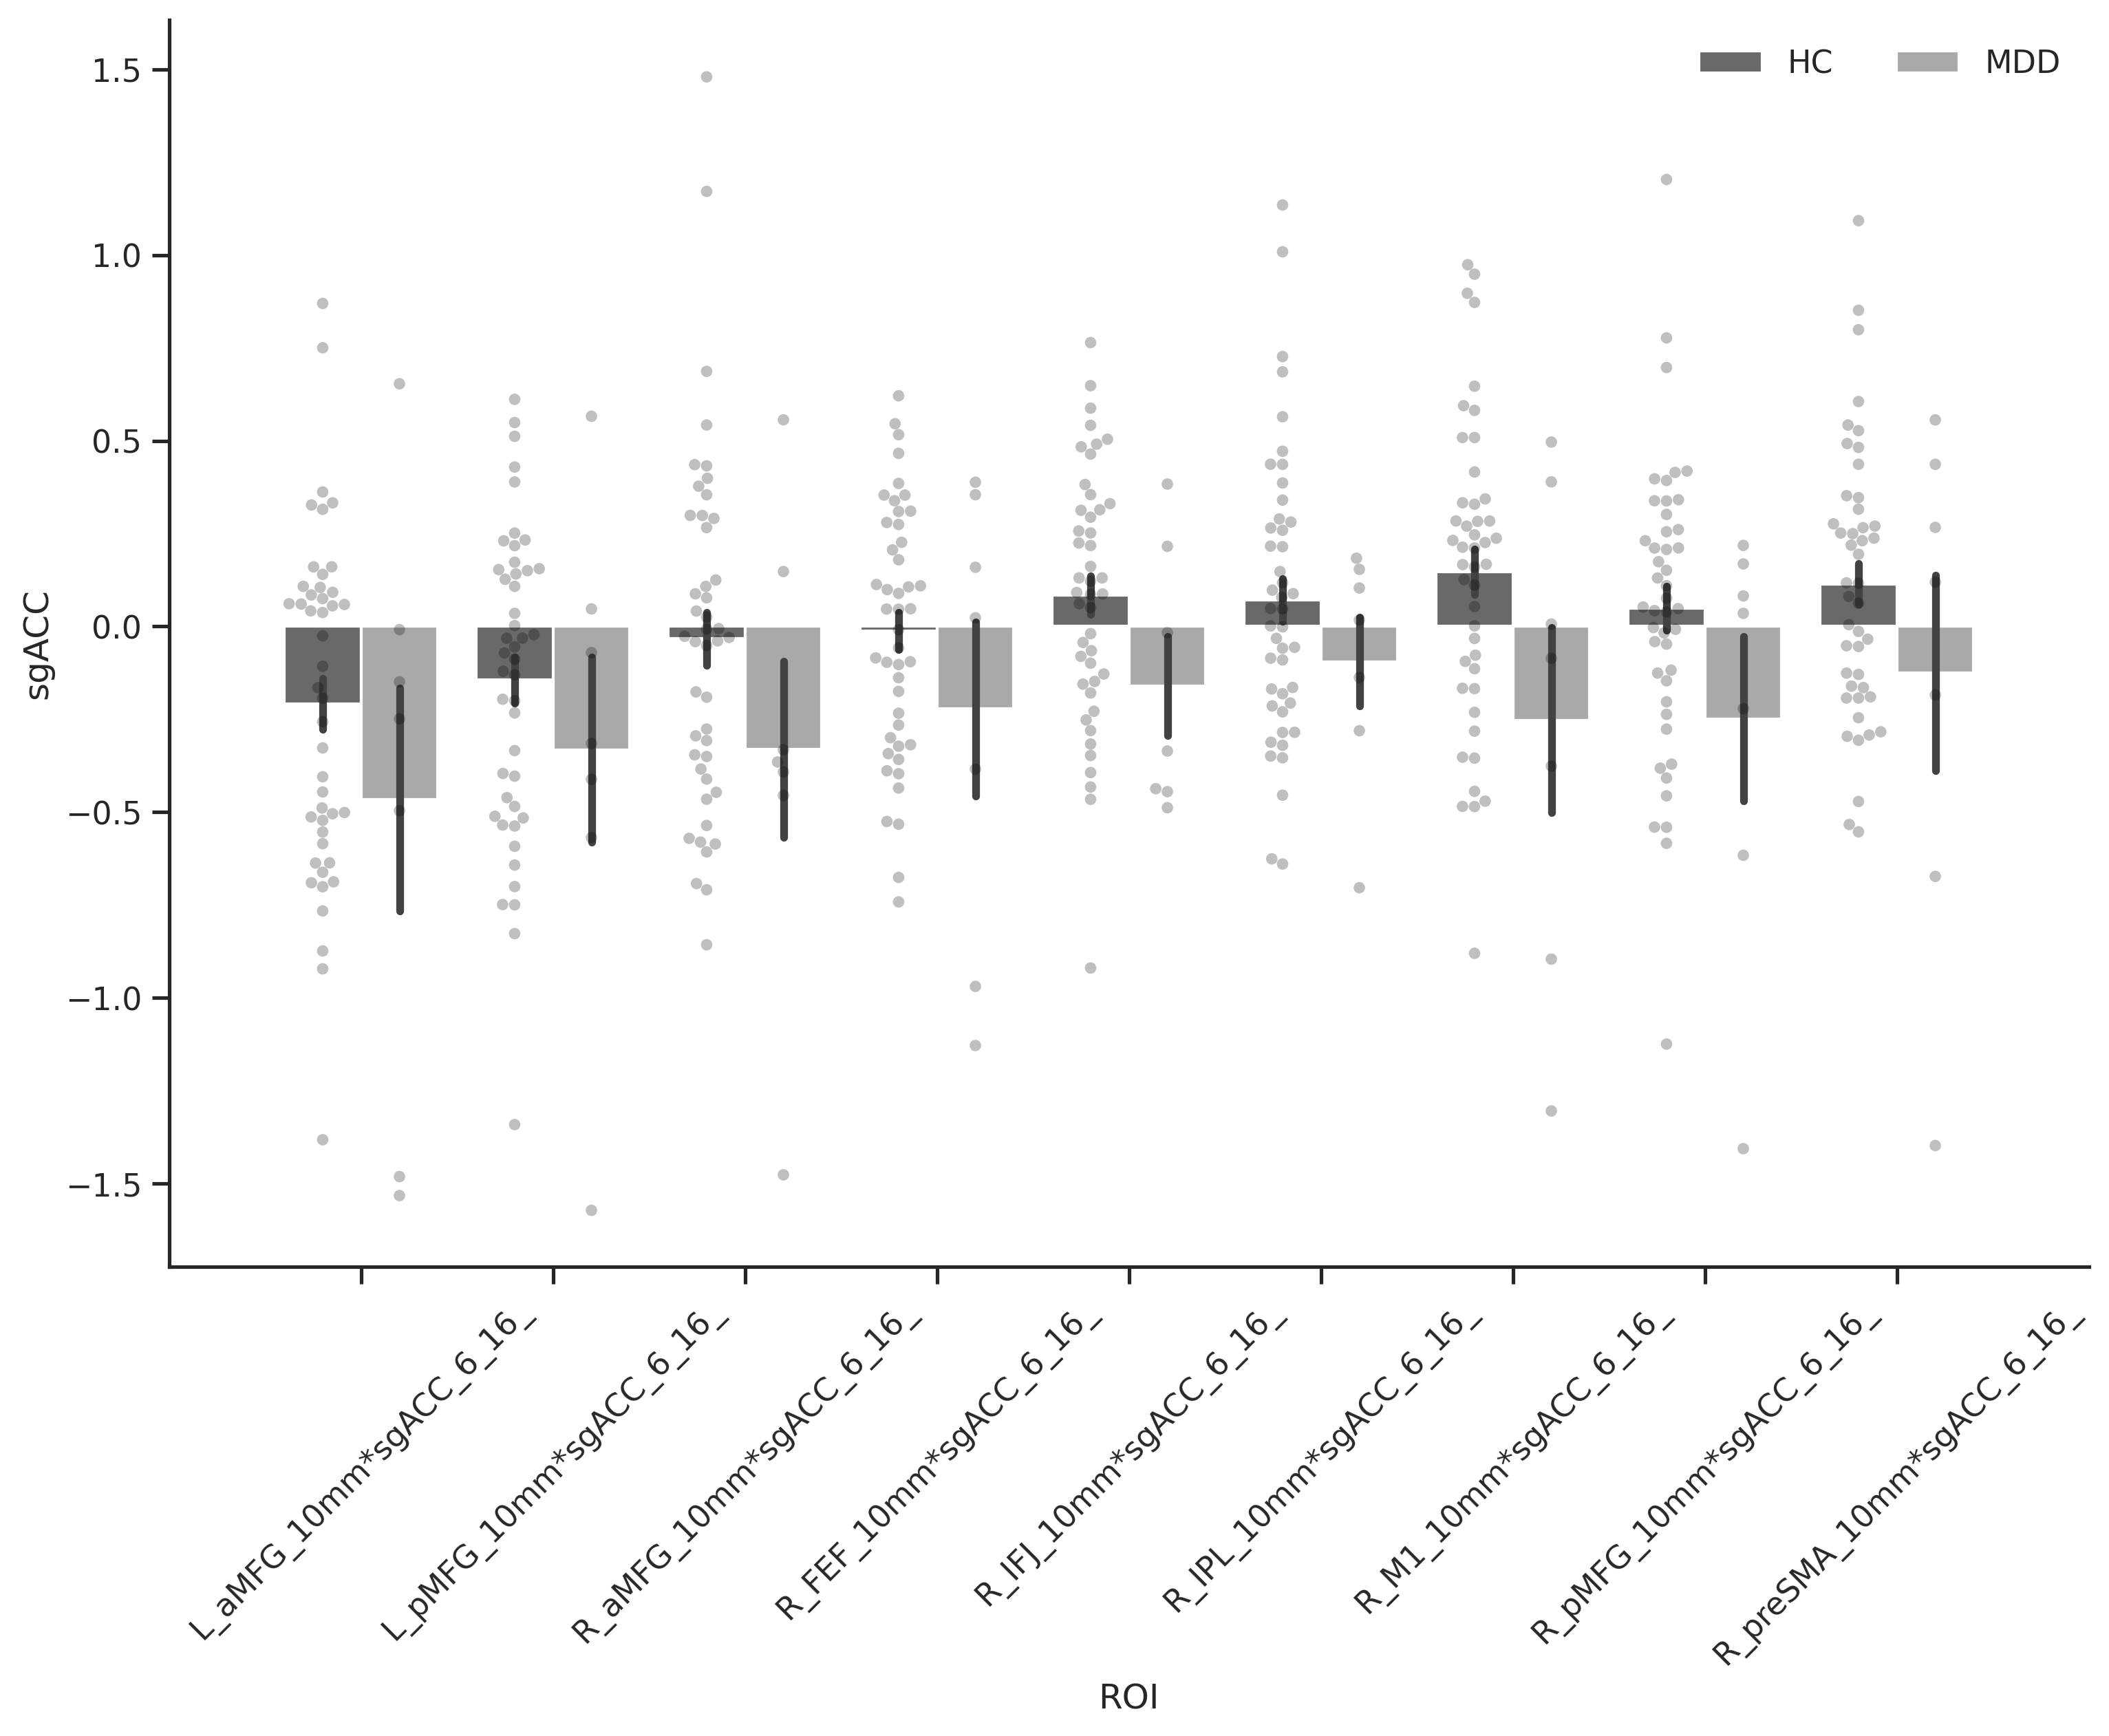

In [55]:
sns.set_style(style='white') 
sns.set_style("ticks")

# 6mm mask:
mask = '_10mm\*'
seed = 'sgACC'

plot_x_order = [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]
cols_select = ["subject_id", "group"] + plot_x_order
xtick_label = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars=["subject_id", "group"], 
                    value_vars=plot_x_order, 
                    var_name="ROI", 
                    value_name="tms_response")

fig = make_plot(data_plot, seed, xtick_label)


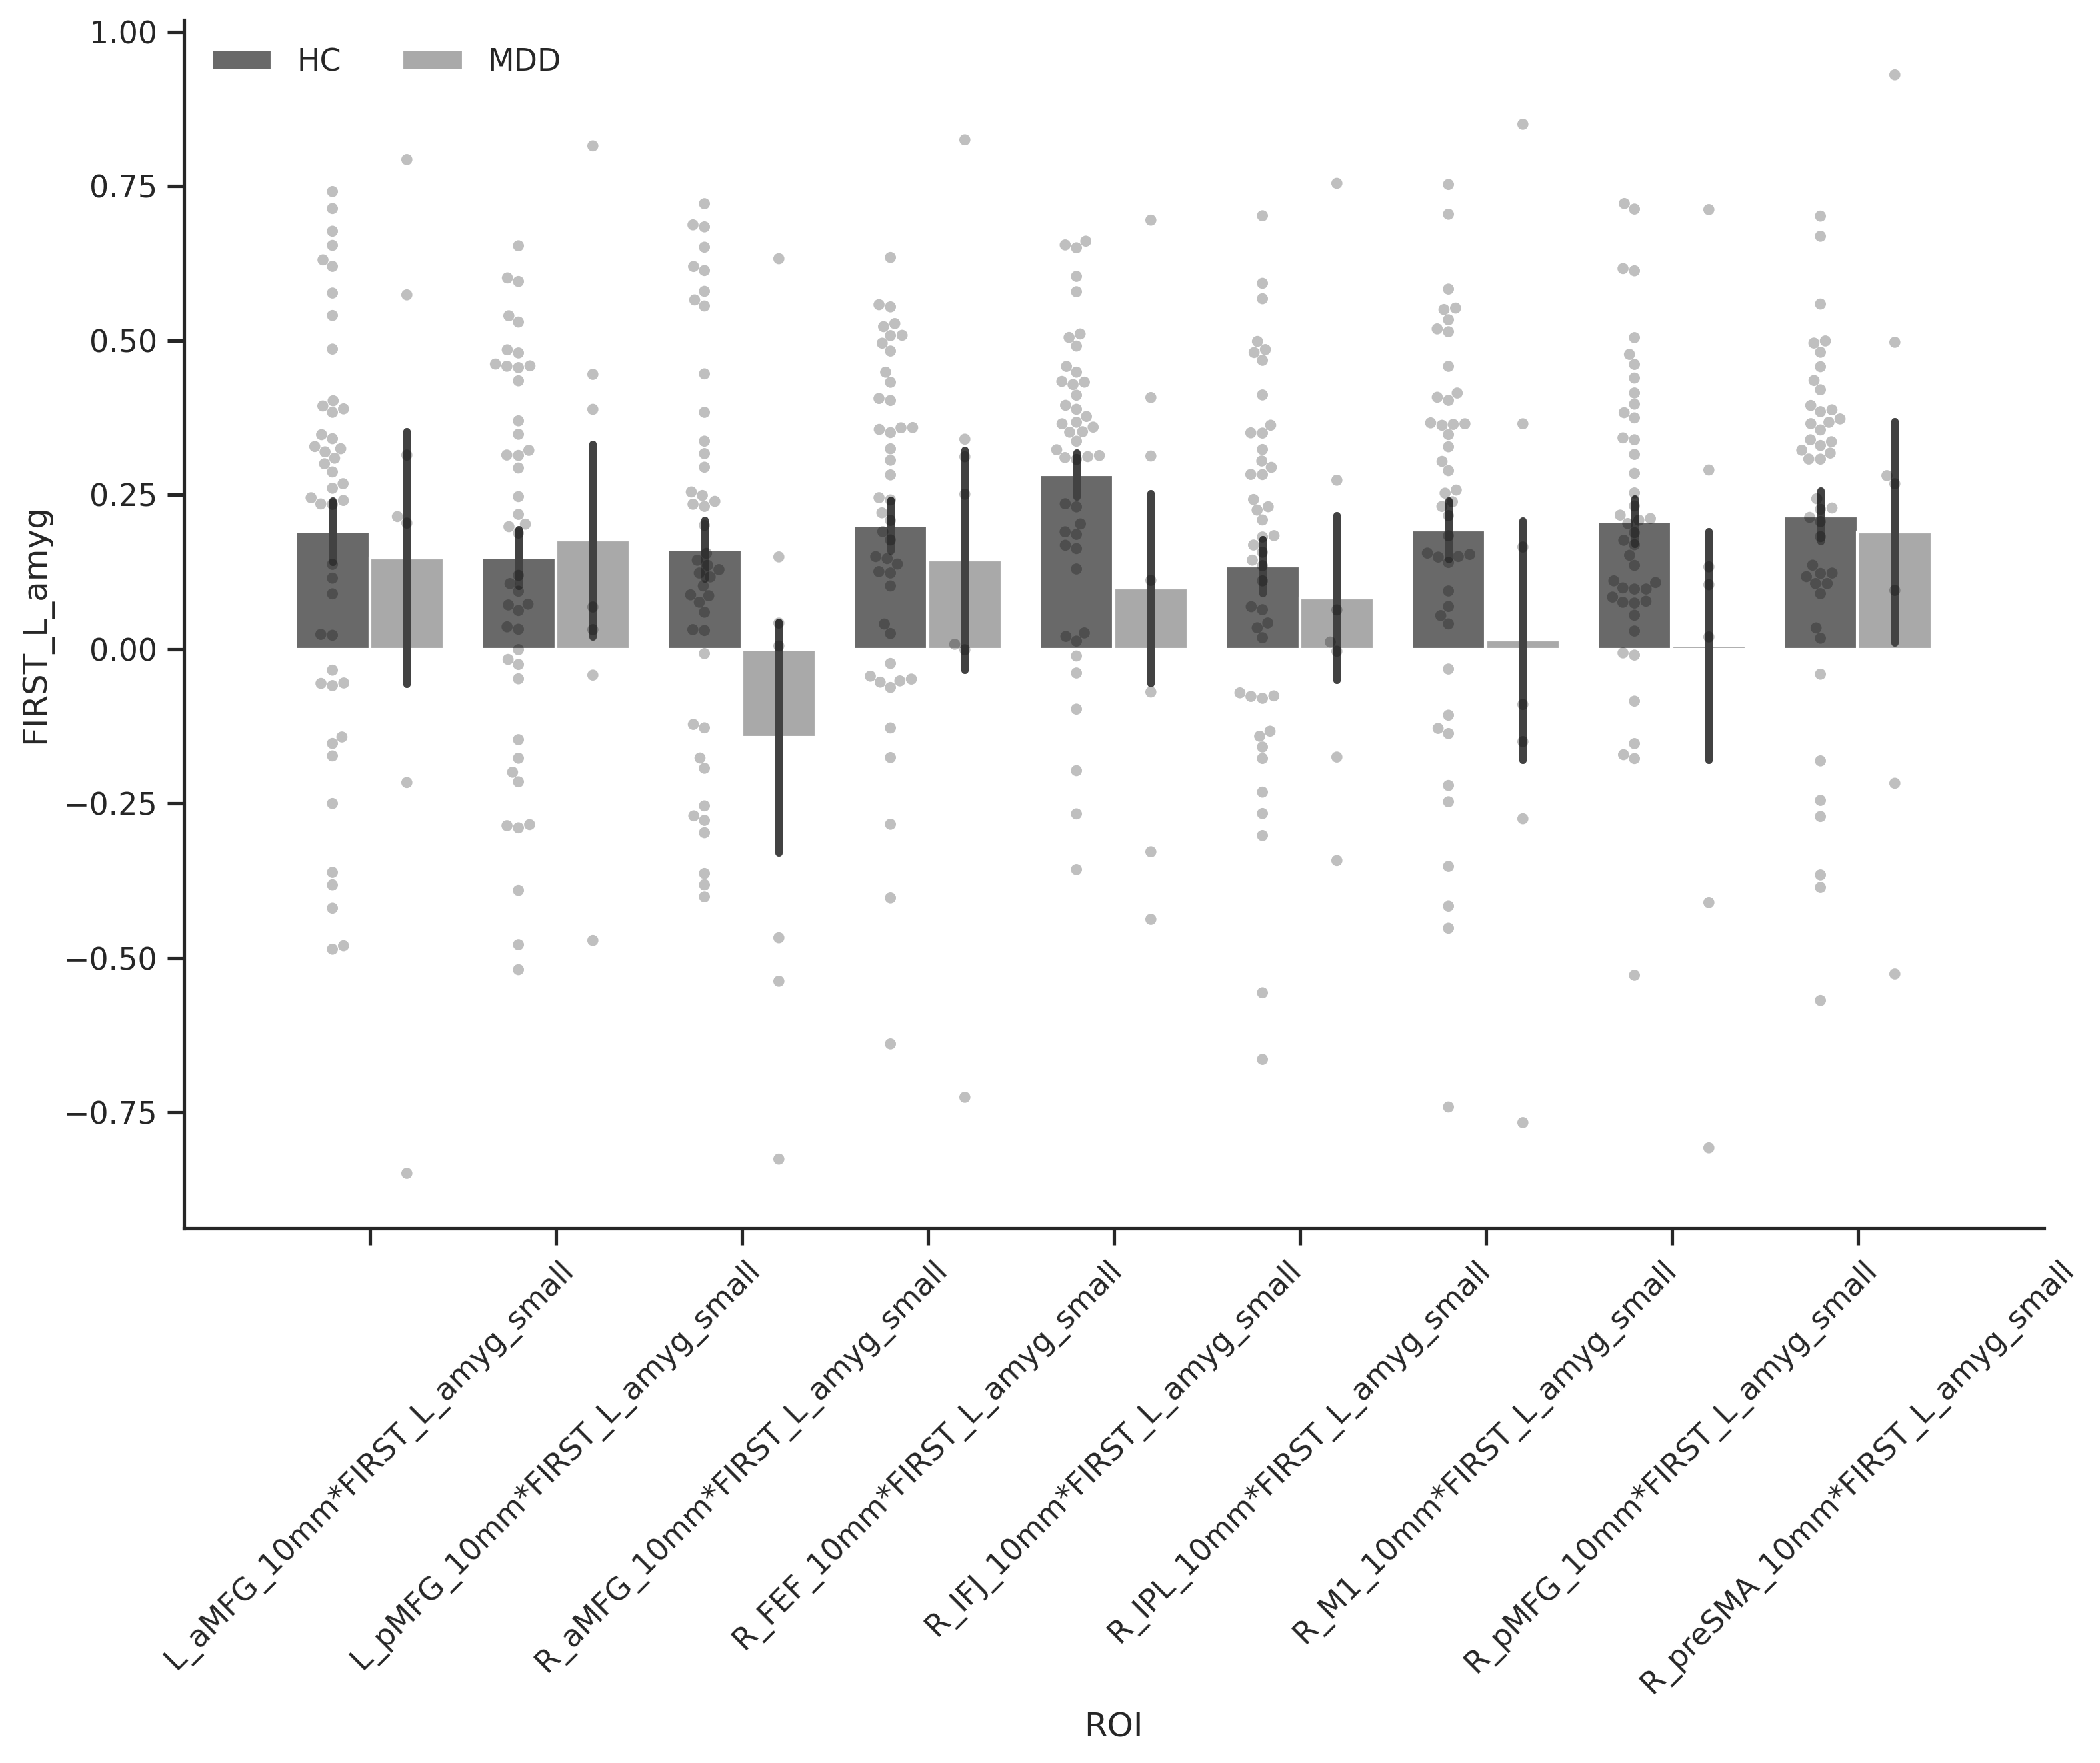

In [56]:
sns.set_style(style='white') 
sns.set_style("ticks")

# mask:
mask = '_10mm\*'
seed = 'FIRST_L_amyg'

plot_x_order = [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]
cols_select  = ["subject_id", "group"] + plot_x_order
xtick_label  = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars    = ["subject_id", "group"], 
                    value_vars = plot_x_order, 
                    var_name   = "ROI", 
                    value_name = "tms_response")

fig = make_plot(data_plot, seed, xtick_label)


In [60]:
df_connectivity = pd.read_csv(output_dir + 'out03_functional_connectivity_z.csv', )

# add mean response of amygdala (of current resting state data) to dataframe:
# roi_name = ["FIRST_B_amyg_small", "FIRST_L_amyg_small", "FIRST_R_amyg_small"]
# roi_index= [0, 1, 2]

# for idx, name in zip(roi_index, roi_name):
#     mean_response = []
#     for i, f in enumerate(df_connectivity['files_target']):
#         df2 = pd.read_csv(files_target[0], sep = '\t')
#         df2.pop(df2.columns[-1])
#         mean_response.append(df2.iloc[i,:].mean())
        
#     df_connectivity[name] = mean_response

# add tms induced responsed in amygdala (of tms session) to dataframe:

col = [
    "FIRST_R_amyg_small",
    "FIRST_B_amyg_small",
    "FIRST_L_amyg_small",
    "sgACC_6_16_-10_10mm",
    'dACC_10mm', 
    'dACC_6mm',
    'r-dACC_MNI152_2mm',
    'l-dACC_MNI152_2mm',
]

### select response data set:
tms_response_hc = pd.read_csv("out02_img_file_info_hc_tms_response.csv")
# tms_response_hc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore_gm.3.csv')

tms_response_mdd = pd.read_csv("out02_img_file_info_nts_tms_response.csv")

tms_response = pd.concat([tms_response_hc, tms_response_mdd], axis = 0, keys = ['HC', 'MDD'])
# tms_response.reset_index(level = 0, inplace = True, names = 'group')
tms_response.reset_index(level = 0, inplace = True)
tms_response.rename(columns = {'level_0': 'group'}, inplace = True)
tms_response = tms_response[['subject_id', 'site'] + col]

df_connectivity_merge = df_connectivity.merge(tms_response, on = 'subject_id', how = 'inner')
df_connectivity_merge


,subject_id,group,L_aMFG_10-6mm*dACC_10mm,L_aMFG_10-6mm*dACC_6mm,L_aMFG_10-6mm*FIRST_B_amyg_small,L_aMFG_10-6mm*FIRST_L_amyg_small,L_aMFG_10-6mm*FIRST_R_amyg_small,L_aMFG_10-6mm*l-dACC_MNI152_2mm,L_aMFG_10-6mm*r-dACC_MNI152_2mm,L_aMFG_10-6mm*sgACC_6_16_-10_10mm,...,R_preSMA_6mm*sgACC_6_16_-10_10mm,site,FIRST_R_amyg_small,FIRST_B_amyg_small,FIRST_L_amyg_small,sgACC_6_16_-10_10mm,dACC_10mm,dACC_6mm,r-dACC_MNI152_2mm,l-dACC_MNI152_2mm
0,1001,NTHC,0.048860,0.071478,0.707818,0.721163,0.635635,0.302993,0.278972,-0.142996,...,0.207563,L_pMFG,-0.204406,-0.240711,-0.280750,-0.343636,-0.655346,-0.606325,-0.533039,-0.750271
1,1001,NTHC,0.048860,0.071478,0.707818,0.721163,0.635635,0.302993,0.278972,-0.142996,...,0.207563,R_M1,-2.610159,-2.152312,-1.647371,-0.081863,-0.985602,-1.034609,-1.010273,-1.309247
2,1001,NTHC,0.048860,0.071478,0.707818,0.721163,0.635635,0.302993,0.278972,-0.142996,...,0.207563,R_pMFG,-0.718149,-0.796545,-0.883004,-0.502097,-1.199960,-1.345277,-1.416834,-1.011564
3,1001,NTHC,0.048860,0.071478,0.707818,0.721163,0.635635,0.302993,0.278972,-0.142996,...,0.207563,R_aMFG,-1.042842,-0.762262,-0.452823,0.715525,-0.059356,-0.147028,0.228923,0.032799
4,1003,NTHC,0.397338,0.403222,-0.225136,-0.144853,-0.212734,0.364194,0.242498,-0.764840,...,-0.005462,L_pMFG,-0.378541,-0.254477,-0.117653,-0.529444,-0.130265,-0.113905,-0.130311,-0.320320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2108,TEHC,0.182257,0.253628,-0.130505,0.067105,-0.269042,0.312723,0.240674,-0.360269,...,-0.167553,L_pMFG,-0.346448,-0.471950,-0.610360,-0.570895,-2.075246,-2.334414,-1.712880,-1.981871
421,2108,TEHC,0.182257,0.253628,-0.130505,0.067105,-0.269042,0.312723,0.240674,-0.360269,...,-0.167553,L_aMFG,-0.179835,-0.416241,-0.676962,-1.221966,0.212947,0.241907,-0.229004,-0.098679
422,2108,TEHC,0.182257,0.253628,-0.130505,0.067105,-0.269042,0.312723,0.240674,-0.360269,...,-0.167553,R_M1,-0.473976,-0.398117,-0.314455,0.066918,-0.521339,-1.125527,0.019497,0.260226
423,2108,TEHC,0.182257,0.253628,-0.130505,0.067105,-0.269042,0.312723,0.240674,-0.360269,...,-0.167553,R_pMFG,-0.740857,-0.741487,-0.742183,-0.549649,-0.401823,-0.492731,-0.112976,-0.408335


In [115]:
# correlation between mean response at amygdala and FC with stimulate site:


roi_name = [
    "L_amyg", "R_amyg", 
    "sgACC", 
    "dACC_10", "dACC_6" ,
    "l-dACC", "r-dACC",
]

# col name for tms induced response
roi_col_name = [
                "FIRST_L_amyg_small", 
                "FIRST_R_amyg_small", 
                "sgACC_6_16_-10_10mm", 
                'dACC_10mm', 
                'dACC_6mm',
                'r-dACC_MNI152_2mm',
                'l-dACC_MNI152_2mm',
               ]

mask_size = '_10mm\*'

plot_data_all = []
for roi, roi_col in zip(roi_name, roi_col_name):
    
    seed_roi = [x for x in df_connectivity_merge.columns if re.search(mask_size, x) and re.search(roi, x)]
#     print(seed_roi)
#     print('---')
    plot_data = []
    
    for seed in seed_roi:
        plot_data_i = df_connectivity_merge[['subject_id', 'group', 'site', roi_col, seed]]
        plot_data_i.columns = ['subject_id', 'group', 'site', 'mean_response', 'connectivity']
        plot_data.append(plot_data_i)
        
    
    plot_data = pd.concat(plot_data, axis = 0, keys = seed_roi)
    plot_data_all.append(plot_data)
    
print(len(plot_data_all))
# print(plot_data_all[6])

plot_data_all = pd.concat(plot_data_all, axis = 0, keys = roi_name)
plot_data_all.reset_index(level = [0, 1], inplace = True)
plot_data_all.columns.values[:2] = ['seed', 'target']
# print(plot_data_all)

plot_data_all['target'].replace({mask_size + '.*': ''}, regex=True, inplace = True)
plot_data_all = plot_data_all.loc[plot_data_all['target'] == plot_data_all['site'], :]
plot_data_all = plot_data_all.loc[(plot_data_all['group'] == "NTHC") | (plot_data_all['group'] == "TEHC") , :]

## remove outliers:
m   = plot_data_all['mean_response'].mean()
std = plot_data_all['mean_response'].std()

lower, upper = m - 2.5 * std, m + 3 * std

print(plot_data_all.loc[(plot_data_all['mean_response']<=lower) | 
                        (plot_data_all['mean_response']>=upper), :])
plot_data_all = plot_data_all.loc[(plot_data_all['mean_response']>lower) & 
                                  (plot_data_all['mean_response']<upper), :]


plot_data_all = plot_data_all.loc[plot_data_all['target'].isin(['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']), :]

plot_data_all['target'] = pd.Categorical(
    plot_data_all['target'], categories=['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1'], ordered=True)

# sorted(plot_data_all['target'].unique())
plot_data_all.head()

# plot_data_all.to_csv('out03_plot_data_tms_induced_response_FC.csv')

7
        seed  target  subject_id group    site  mean_response  connectivity
266   L_amyg  L_aMFG        2008  TEHC  L_aMFG      -1.897754      0.122585
320   L_amyg  L_aMFG        2047  TEHC  L_aMFG      -2.946829     -0.115493
51    L_amyg  L_pMFG        1027  NTHC  L_pMFG      -2.656261      0.062363
203   L_amyg  L_pMFG        1105  NTHC  L_pMFG      -1.948128      0.539881
280   L_amyg  L_pMFG        2012  TEHC  L_pMFG      -2.348013      0.171346
305   L_amyg  L_pMFG        2040  TEHC  L_pMFG      -2.206128     -0.426613
315   L_amyg  L_pMFG        2044  TEHC  L_pMFG      -2.246958      0.143619
319   L_amyg  L_pMFG        2047  TEHC  L_pMFG      -2.208321     -0.269029
6     L_amyg  R_pMFG        1003  NTHC  R_pMFG      -1.989436      0.203310
74    L_amyg  R_pMFG        1036  NTHC  R_pMFG      -2.739173      0.438993
51    R_amyg  L_pMFG        1027  NTHC  L_pMFG      -2.572802      0.325569
280   R_amyg  L_pMFG        2012  TEHC  L_pMFG      -2.252658      0.614621
315   R_am

,seed,target,subject_id,group,site,mean_response,connectivity
5,L_amyg,L_aMFG,1003,NTHC,L_aMFG,0.856258,-0.152959
9,L_amyg,L_aMFG,1009,NTHC,L_aMFG,-0.627238,0.389088
14,L_amyg,L_aMFG,1015,NTHC,L_aMFG,-1.257596,0.137164
19,L_amyg,L_aMFG,1016,NTHC,L_aMFG,0.157736,0.393759
24,L_amyg,L_aMFG,1019,NTHC,L_aMFG,0.117085,0.240689


In [116]:
plot_data_all['seed'].drop_duplicates()

5     L_amyg
5     R_amyg
5      sgACC
5    dACC_10
5     dACC_6
5     l-dACC
5     r-dACC
Name: seed, dtype: object

In [117]:
# scatter plot:

from scipy.stats import pearsonr
# we don't need partial correlation this could be eliminated to make the code cleaner
from pingouin import partial_corr
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(4.2 * 9, 4.2 * 3)}, font_scale = 1)
sns.set_style("ticks")

# plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search("FIRST_L_amyg_small", x)]
# colors = [
#     mcolors.CSS4_COLORS['dimgray'], 
#     mcolors.CSS4_COLORS['darkgrey'],
#     mcolors.CSS4_COLORS['darkgrey'],
# ]

colors = [
    '#3D59AB', 
    '#6495ED',
    '#458B00',
]


# colors = sns.color_palette("husl", 5).as_hex()
# colors = [colors[0], colors[2]]

scatter_para = {'alpha': 0.7, 's': 30, 'linewidth': 0.2}

def scatter_plot(plot_data, row_order):
    
    g = sns.lmplot(x           = "connectivity",
                   y           = 'mean_response', 
                   #hue         = 'group', 
                   #hue_order   = ['NTHC', 'NTS'],
                   palette     = colors, 
                   #markers     = ['o', 'v',],
                   hue         = 'seed',
                   row         = 'target', 
                   row_order   = row_order,
                   col         = 'seed', 
                   data        = plot_data, 
                   fit_reg     = True, 
                   facet_kws   = {'sharex': False, 'sharey': True},
                   scatter_kws = scatter_para, 
                   line_kws    = {'lw': 2},
                   x_jitter    = 0, 
                   order       = 1,
                   height      = 3.27, 
                   aspect      = 1, 
                   robust      = False,
                   legend      = False)
    
    # compute R squared for each group and cluster:
    column_title = plot_data['seed'].unique()
    
    # use row_order to make sure label and data match correctly:
    #row_title = sorted(plot_data['target'].unique())
    row_title = row_order 
        
    # add legend last column of each row:
#     for row in range(len(row_title)):
#         ## create custom legend for regplot:
#         hc_line = mlines.Line2D([], [], color=colors[0], marker='o',linewidth=4,
#                           markersize=8, label='HC')
#         dis_line = mlines.Line2D([], [], color=colors[1], marker='v', linewidth=4, #lineStyle = 'dashed',
#                                   markersize=8, label='MDD')

#         g.axes[row, -1].legend(handles=[hc_line, dis_line], 
#                                loc = 'lower right',frameon=False)
#         plt.setp(g.axes[row, -1].get_legend().get_texts(), fontsize='12')
    
#     x_pos = [18, 12, 71, 48, 7, -5]
#     x_lim = [[16, 62], [11.5, 18.5], [69, 102], [46, 85], [6, 25], [-10, 100]]
    
    # add annotation (correlation value) and some adjustments to the axes:
    for col in range(len(column_title)):
        for row in range(len(row_title)):
            
            # HC:
            x = plot_data.loc[(plot_data['target']==row_title[row])
                              & (plot_data['seed']==column_title[col])
                              #& (plot_data['group']=='NTHC')
                              , 'mean_response'].values
            
            y = plot_data.loc[(plot_data['target']==row_title[row])
                              & (plot_data['seed']==column_title[col]) 
                              #& (plot_data['group']=='NTHC')
                              , 'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             print(any(idx_nan))
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
            r, p = pearsonr(x, y)
#             label1 = "HC: $r$ = %.3f, $p$ = %.3f" % (r, p)
            label1 = "$r$ = %.3f, $p$ = %.3f" % (r, p)
            if p < .05:
                label1 += '*'
             
            # MDD:
#             x = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'mean_response'].values
            
#             y = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
#             label2 = "MDD: $r$ = %.3f, $p$ = %.3f" % (r, p)
#             if p < .05:
#                 label2 += '*'
                     
    
            g.axes[row, col].set_xlim([-.8, .6])
            xticks = np.arange(-.8, .8, .2)
            g.axes[row, col].set_xticks(xticks)
        
            xlim = g.axes[row, col].get_xlim()
            label_x = xlim[0] + (xlim[1] - xlim[0]) * .1
        
            ylim = g.axes[row, col].get_ylim()
            label_y1 = ylim[1] - (ylim[1] - ylim[0]) * .1
            
            g.axes[row, col].text(label_x, label_y1, label1, fontsize = 13)
#             g.axes[row, col].text(label_x[col], label_y2, label2, fontsize = 13)
        
            # Hide the right and top spines
            g.axes[row, col].spines['right'].set_visible(False)
            g.axes[row, col].spines['top'].set_visible(False)
            
    
    # change x and y label:
    for row in range(len(row_title)): 
        g.axes[row, 0].set(ylabel='TMS induced response')
            
    return g



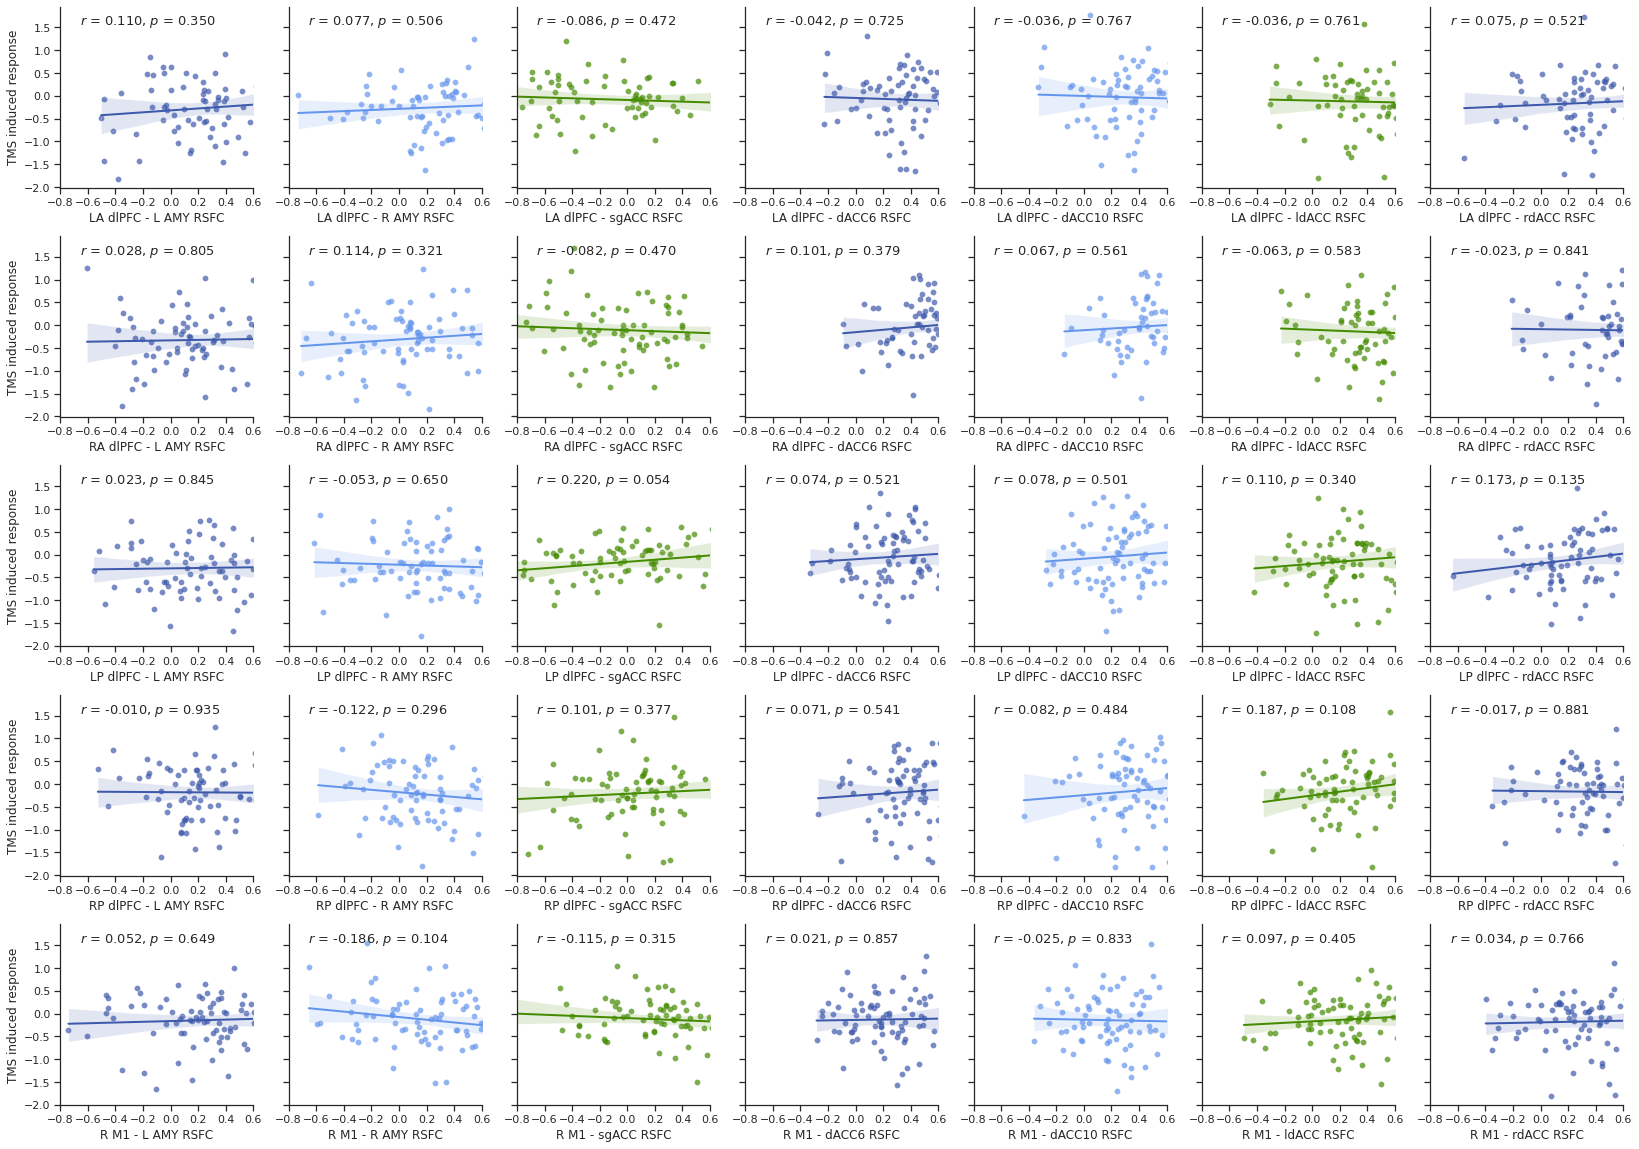

In [118]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']
fig = scatter_plot(plot_data_all, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)): 
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - dACC6 RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - dACC10 RSFC', title = '')
    fig.axes[row, 5].set(xlabel = x_label_list[row] + ' - ldACC RSFC', title = '')
    fig.axes[row, 6].set(xlabel = x_label_list[row] + ' - rdACC RSFC', title = '')
    


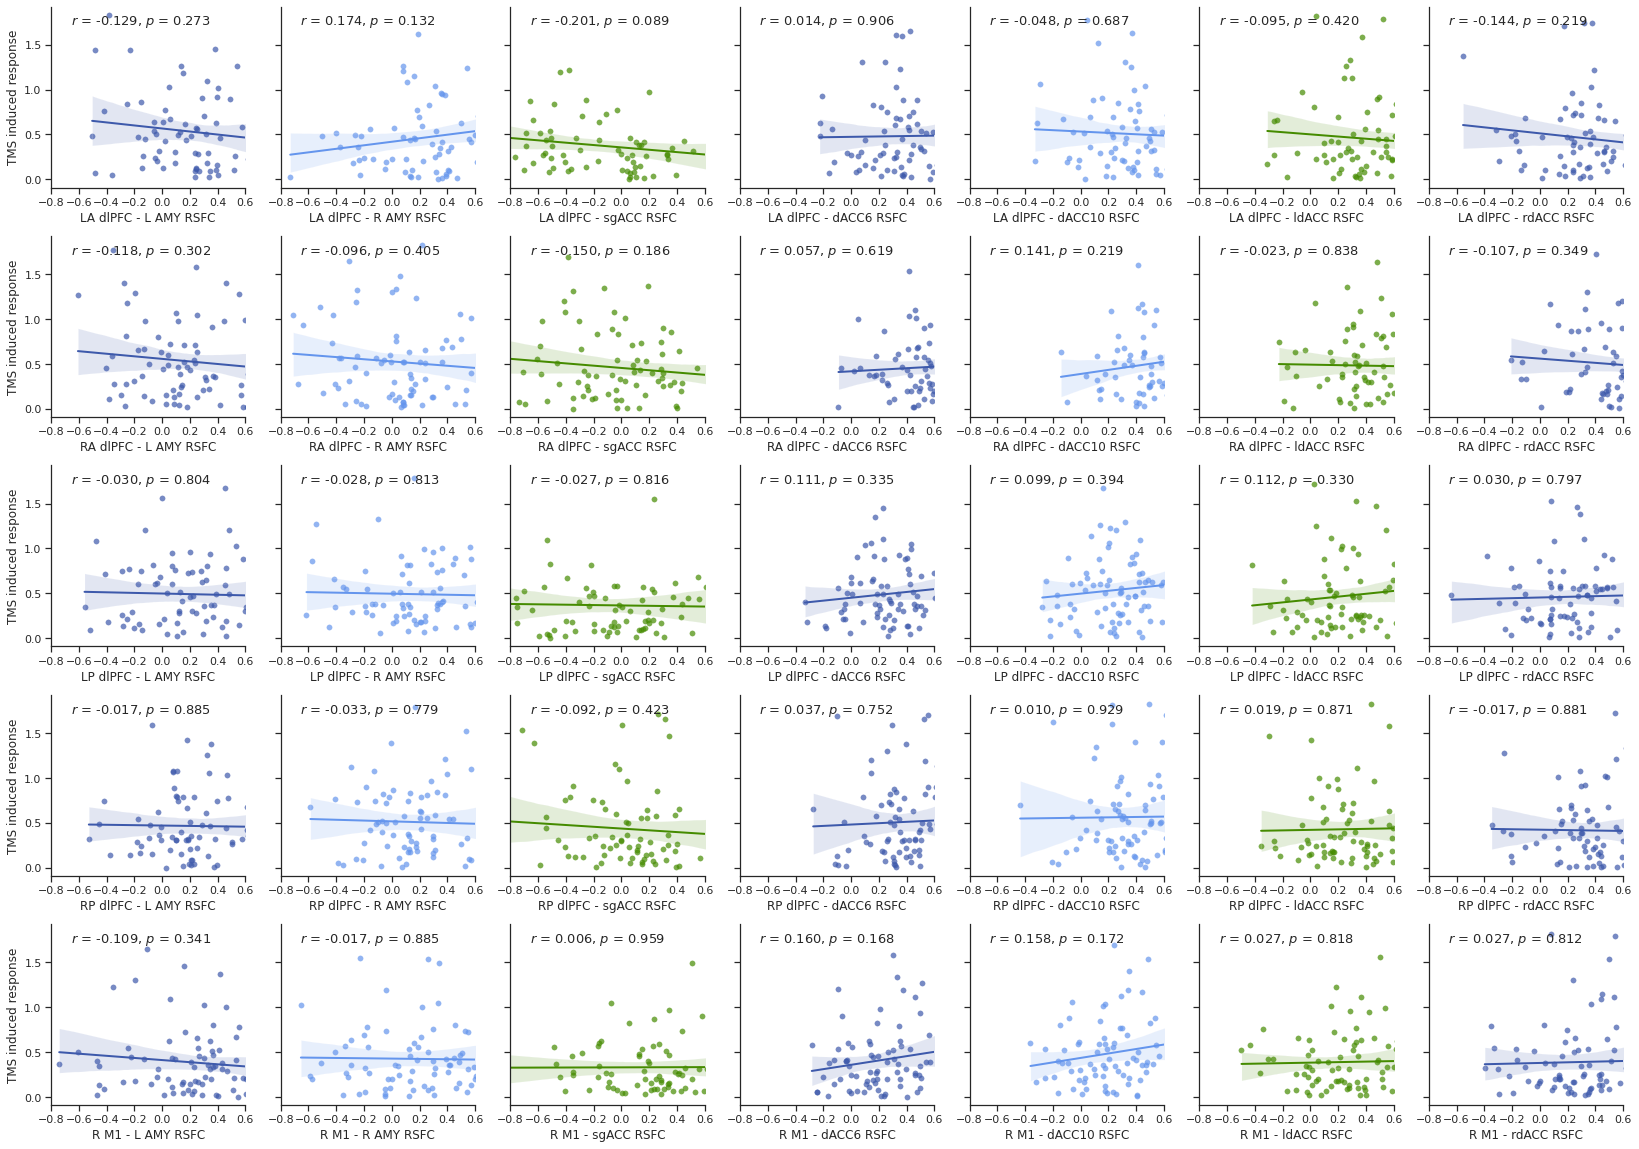

In [120]:
## show absolute connectivities:

# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_abs = plot_data_all.copy()
plot_data_all_abs['mean_response'] = abs(plot_data_all['mean_response'])
fig = scatter_plot(plot_data_all_abs, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')
    fig.axes[row, 3].set(xlabel = x_label_list[row] + ' - dACC6 RSFC', title = '')
    fig.axes[row, 4].set(xlabel = x_label_list[row] + ' - dACC10 RSFC', title = '')
    fig.axes[row, 5].set(xlabel = x_label_list[row] + ' - ldACC RSFC', title = '')
    fig.axes[row, 6].set(xlabel = x_label_list[row] + ' - rdACC RSFC', title = '')


In [ ]:
## show positive connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_pos = plot_data_all.loc[plot_data_all['connectivity'] >=0, :]
fig = scatter_plot(plot_data_all_pos, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

ValueError: x and y must have length at least 2.

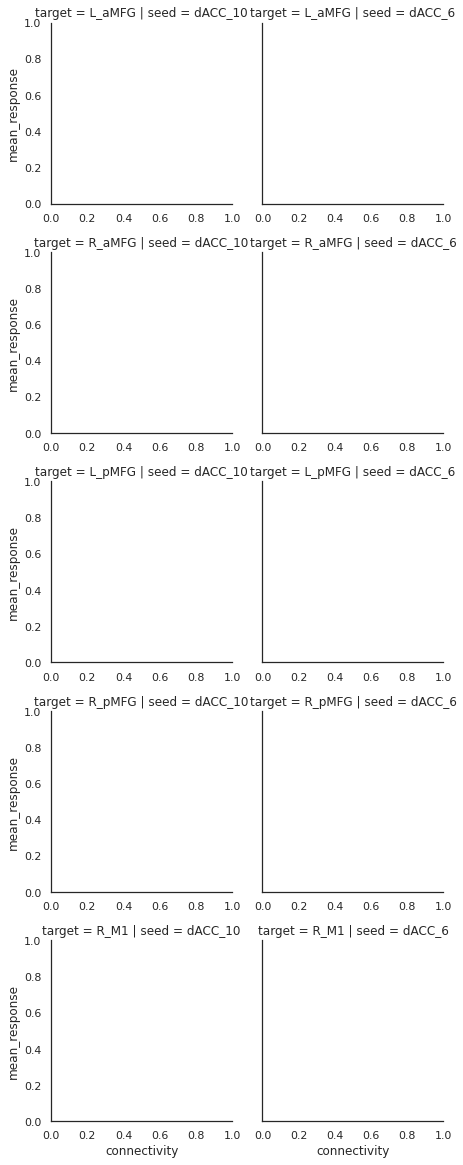

In [37]:
## show negative connectivities:

sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_neg = plot_data_all.loc[plot_data_all['connectivity'] < 0, :]
fig = scatter_plot(plot_data_all_neg, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

[Text(0.5, 33.078125, 'RA dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

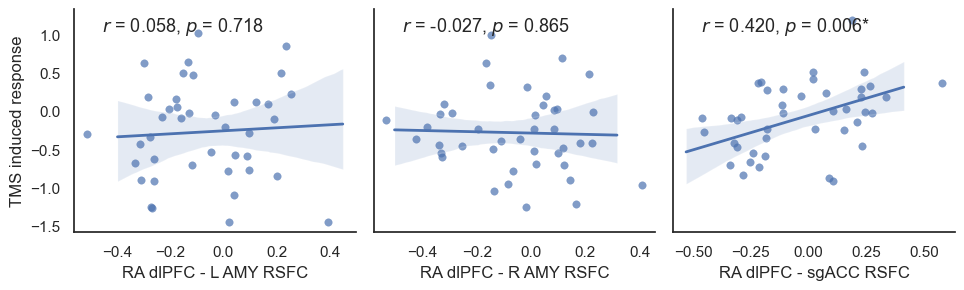

In [41]:
sns.set_style(style='white')

fig = scatter_plot(plot_data_all.loc[plot_data_all['target'] == 'L_aMFG',:], ['L_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'RA dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

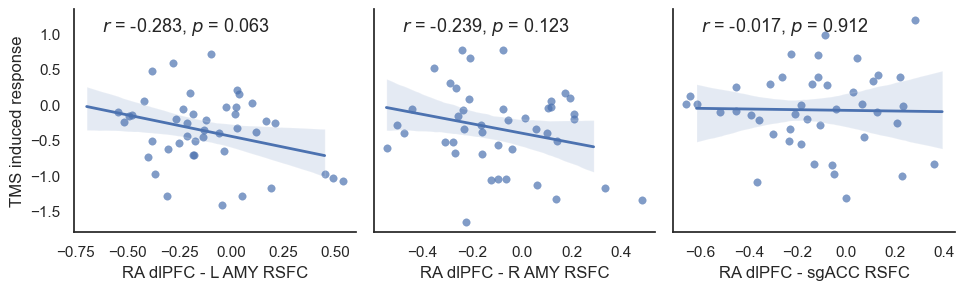

In [40]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_aMFG',:], ['R_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'RP dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

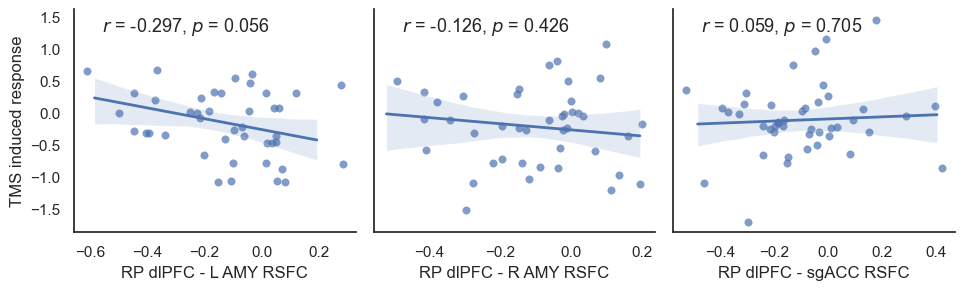

In [38]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_pMFG',:], ['R_pMFG'])

fig.axes[0, 0].set(xlabel = 'RP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RP dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'LP dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

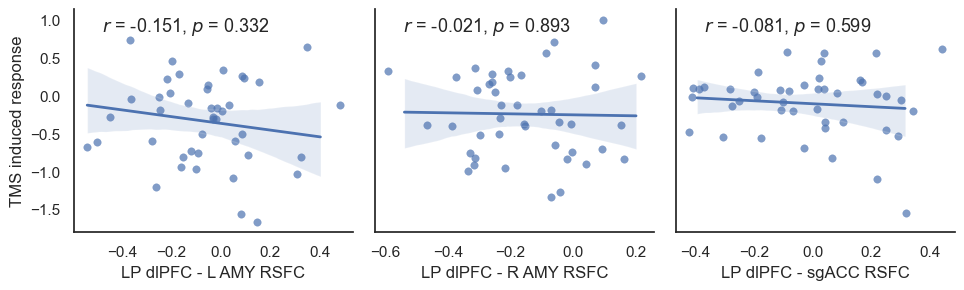

In [42]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'L_pMFG',:], ['L_pMFG'])

fig.axes[0, 0].set(xlabel = 'LP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'LP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'LP dlPFC - sgACC RSFC', title = '')
